<a href="https://colab.research.google.com/github/JSA-V/Problem-sets-solutions-Introduction-to-Computational-Thinking-and-Data-Science-MIT-/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

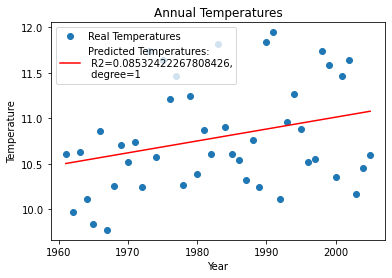

In [ ]:
import numpy as np
import pylab
import re
import matplotlib.pyplot as plt


# cities in our weather data
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

INTERVAL_1 = list(range(1961, 2006))
INTERVAL_2 = list(range(2006, 2016))

"""
Begin helper code
"""
class Climate(object):
    """
    The collection of temperature records loaded from given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}

        f = open(filename, 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature
            
        f.close()

    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a numpy 1-d array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return np.array(temperatures)

    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]



"""
End helper code
"""

# Problem 1
def generate_models(x, y, degs):
    """
    Generate regression models by fitting a polynomial for each degree in degs
    to points (x, y).
    Args:
        x: a list with length N, representing the x-coords of N sample points
        y: a list with length N, representing the y-coords of N sample points
        degs: a list of degrees of the fitting polynomial
    Returns:
        a list of numpy arrays, where each array is a 1-d array of coefficients
        that minimizes the squared error of the fitting polynomial
    """
    return [np.polyfit(x,y,n) for n in degs]
    


# Problem 2
def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
    """
    y=np.array(y)
    estimated=np.array(estimated)
    error = np.sum((estimated - y)**2)
    meanError = error/len(y)
    return 1 - (meanError/np.var(y))

# Problem 3
def evaluate_models_on_training(x, y, models):
    """
    For each regression model, compute the R-square for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points
    Args:
        x: a list of length N, representing the x-coords of N sample points
        y: a list of length N, representing the y-coords of N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a numpy array storing the coefficients of
            a polynomial.
    Returns:
        None
    """
    for model in models:
      plt.clf()
      plt.xlabel('Year')
      plt.ylabel('Temperature')
      plt.title('Annual Temperatures')
      pylab.plot(x,y,'o',label='Real Temperatures')
      predictions=np.polyval(model,x)
      pylab.plot(x,predictions,'r',
                 label=f'Predicted Temperatures:\n R2={r_squared(y,predictions)},\n degree={len(model)-1}')
      plt.legend()
### Begining of program
raw_data = Climate('data.csv')

# Problem 3
y = []
x = INTERVAL_1
for year in INTERVAL_1:
    y.append(raw_data.get_daily_temp('BOSTON', 1, 10, year))
models = generate_models(x, y, [1])
evaluate_models_on_training(x, y, models)


# Problem 4: FILL IN MISSING CODE TO GENERATE y VALUES
x1 = INTERVAL_1
x2 = INTERVAL_2
y = []
# MISSING:
for year in INTERVAL_1:
  y.append(np.mean(raw_data.get_yearly_temp('BOSTON', year)))

models = generate_models(x, y, [1])    
evaluate_models_on_training(x, y, models)
